# Assignment - Logistic Regression
### Year 2018-2019  - Semester II
### CCE3502
####  developed by - Adrian Muscat, 2019
---
# Daniel Cauchi, 357699M, BSc CS, Yr II

---


## In this assignment you will implement a gradient descent optimizer to tune a logistic regression model that labels fish as either one species or the other.


In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
# this line plots graphs in line
%matplotlib inline

## Exercise in Class: 
### to find the input values that minimize  
### (i) a univariate quadratic, 
### and (ii) a bi-variate quadratic

### Exercise 1:

### 1. Plot the below univariate quadratic function ($0.0 < x < 4.0$)
##        $$f(x) = x^2 - 4x + 3$$
### 2. Compute the derivative wrt $x $ 
### 3. Implement the gradient descent algorithm to find the value of $x$ that minimizes $f(x)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

1.9999714550461458


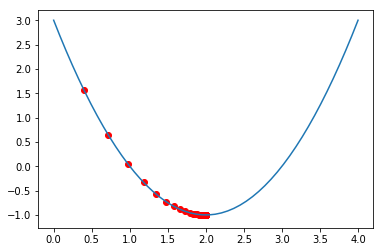

In [2]:
x = np.linspace(0.,4.,50)
y = x**2 - 4*x + 3
plt.plot(x,y)

# 9 = partial derivative
# x = x' - ALPHA(9f/9x)
# f'(X) = 9f/9x = 2x - 4 # gives direction of maximum ascent

ALPHA = 0.1
x_gd = 0
x_gradient_descent = np.empty(50)

for i in range(50):
    x_gradient_descent[i] = x_gd - ALPHA * (2*x_gd - 4)
    x_gd = x_gradient_descent[i]
        
y_gradient_descent = x_gradient_descent**2 - 4*x_gradient_descent + 3
plt.scatter (x_gradient_descent, y_gradient_descent, c = 'r')

print(x_gd)

### Exercise 2:

### 1. Plot the below bi-variate quadratic function on a 3D wireframe graph.
##  $$f(x,y) = x^2 + y^2 + 1$$
### for $-20.0 < x < 20.0$ and $-20.0<y<20.0$
### 2. Compute the partial derivatives wrt $x$ and $y$
### 3. Implement the gradient descent algorithm to find the value of $(x,y)$ that minimizes $f(x,y)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

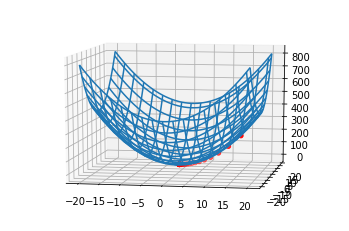

In [3]:
# 9f/9x = 2x
# 9f/9x = 2y

def func(x, y):
    return x**2 + y**2 + 1

def gradient_descent_func(x):
    return 2 * x

x = np.linspace(-20,20,50)
y = np.linspace(-20,20,50)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y) # tile and repeat
f = func(X, Y)
ax.plot_wireframe(X,Y,f, rstride=3, cstride=3)

ALPHA = 0.1
x_gd = 19
x_gradient_descent = np.empty(50)

y_gd = 0.1
y_gradient_descent = np.empty(50)

for i in range(50):
    x_gradient_descent[i] = x_gd - ALPHA * gradient_descent_func(x_gd)
    x_gd = x_gradient_descent[i]
    y_gradient_descent[i] = y_gd - ALPHA * gradient_descent_func(y_gd)
    y_gd = y_gradient_descent[i]


f = func(x_gradient_descent, y_gradient_descent)

ax.scatter(x_gradient_descent,y_gradient_descent,f, c='r')
ax.view_init(10, 280)

## A system measures the width and length in centimetres of two fish species, spnott and awrat.  The results are given in a csv (comma separated) text file. In this assignment you will develop a linear discriminant function and a logistic regressor that model the data. 



## We first load the dataset and print the first 10 entries.  The length is given in the 1st column, the width is given in the second column and the species is given in the third column.


In [4]:
# DO NOT MODIFY THIS CELL
with open('Fish_Dataset_2019.csv', 'r') as f:
#with open('Fish_Dataset_2019.csv', 'rbU') as f:
    reader = csv.reader(f)
    data_=[]
    for i,row in enumerate(reader):
        if i==0: 
            print (row)
        else:
            data_.append(row)
data = np.array(data_,dtype=float)
data[0:10]

['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']


array([[30.49,  9.4 ,  0.  ],
       [17.87,  5.62,  1.  ],
       [22.52,  5.56,  0.  ],
       [27.95, 10.55,  1.  ],
       [36.75, 10.49,  0.  ],
       [32.27, 13.06,  1.  ],
       [26.06,  8.16,  0.  ],
       [19.94,  6.4 ,  1.  ],
       [25.89,  8.5 ,  0.  ],
       [29.96, 11.56,  1.  ]])

# Graded Questions below [max marks = 100]

## What is the size of the dataset and the class distribution?


In [5]:
print ('size of dataset  = ', len(data))
fish_1_0 = data[:,2] # the second column
print ('number of spnott = ', (fish_1_0 == 0).sum())
print ('number of awrat  = ', (fish_1_0 == 1).sum())

size of dataset  =  240
number of spnott =  120
number of awrat  =  120


## Plot a scatter-plot that depicts spnott as a blue dot and awrat as a red dot. As you will see we have to use both input variables, since any variable on its own does not provide enough discrimination power. [5 marks]


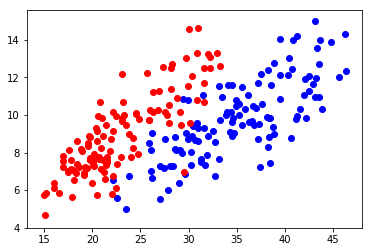

In [6]:
spnott = []
awrat = []

for fish in data:
    if fish[2] == 0.:
        spnott.append(fish)
    else:
        awrat.append(fish)
        
spnott = np.array(spnott)
awrat = np.array(awrat)

plt.scatter(spnott[:,0], spnott[:,1], c = 'b')
plt.scatter(awrat[:,0], awrat[:,1], c = 'r')

## Comment on whether the two input variables are correlated. [5 marks]


In [7]:
# The 2 variables seem to be correlated linearly, 
# each type of fish with a similar gradient, but different intercept.

print("correlation matrix between spnott length and Width:")
print(np.corrcoef(spnott[:,0], spnott[:,1]))
print("correlation matrix between awrat length and Width:")
print(np.corrcoef(awrat[:,0], awrat[:,1]))

correlation matrix between spnott length and Width:
[[1.        0.7693746]
 [0.7693746 1.       ]]
correlation matrix between awrat length and Width:
[[1.         0.82760293]
 [0.82760293 1.        ]]


#### As can be seen from the matrices, the correlation is quite close to 1, meaning there is a positive correlation between the 2 inputs

## We will now split the dataset into two parts. One part is called the training set and the other part is called the test set.


In [8]:
# DO NOT MODIFY THIS CELL
train_split = int(len(data)*0.7)
print ('Split dataset at ', train_split)
d_train=np.array(data[0:train_split,:])
d_test = np.array(data[train_split:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))

Split dataset at  168
Shape of train =  (168, 3)
Shape of test =  (72, 3)


In [9]:
spnott_train = []
awrat_train = []
spnott_test = []
awrat_test = []

for fish in d_train:
    if fish[2] == 0.:
        spnott_train.append(fish)
    else:
        awrat_train.append(fish)
        
for fish in d_test:
    if fish[2] == 0.:
        spnott_test.append(fish)
    else:
        awrat_test.append(fish)
        
spnott_train = np.array(spnott_train)
awrat_train = np.array(awrat_train)
spnott_test = np.array(spnott_test)
awrat_test = np.array(awrat_test)

## Plot a scatter-plot for the training set and on the same plot add a green line that separates the two classes.  Manually, vary the gradient and intercept coefficient to minimize the overall classification error. [10 marks]


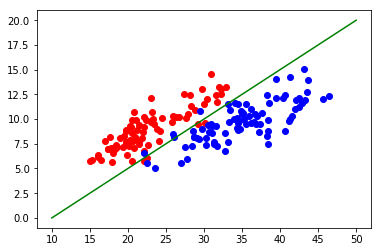

In [10]:
spnott = []
awrat = []

for fish in d_train:
    if fish[2] == 0.:
        spnott.append(fish)
    else:
        awrat.append(fish)
        
spnott = np.array(spnott)
awrat = np.array(awrat)

plt.scatter(awrat[:,0], awrat[:,1], c = 'r')
plt.scatter(spnott[:,0], spnott[:,1], c = 'b')

def y_mx_c(x, m = 0, c = 0):
    return m*x + c

m = 0.5
c = -5
x = np.linspace(10,50)
plt.plot(x, y_mx_c(x, m, c), c = 'g')

## Develop a vectorised function to predict the class given the weights for a linear descision boundary and the input features for a dataset. [10 marks]

In [11]:
def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))

def predict_y(W = [],D = [[]]): # returns array of ys (1 or 0)
    """
    W = weight vector [w0, w1, w2, ...]
    D = Dataset: [x1, x2, ...]
    """
    W = W.copy()
    W.shape = (1, len(W)) # row
    z = np.zeros(D.shape[0])
    z += W[0][0] # bias
    z += np.dot(W[0][1:], D.T)
    ones_or_zeros = np.empty(len(D))
    for i in range(len(ones_or_zeros)):
        ones_or_zeros[i] = (0 if sigmoid(z[i])<0.5 else 1)
    
    return ones_or_zeros
          
print(predict_y(np.asarray([0.4,-.4,1.1]), data[:,[0,1]]))

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


## Develop a function to calculate the error, given the predicted values and the dataset (complete with gold labels) [10 marks]

In [12]:
# bad_predicted/size of data set
def get_error(D,Y):
    D = D[:,2]
    good_predicted = 0
    for i in range(len(D)):
        if D[i] == Y[i]:
            good_predicted += 1
    
    return (len(D)-good_predicted)/len(D)

print(get_error(data, [1] * len(data)))

0.5


## Develop a function to calculate the classification accuracy, given the predicted values and the data set [5 marks]

In [13]:
# succes rate (1 - error)
def get_accuracy(D,Y): # D and Y have the same length (both 1 or 0)
    return 1 - get_error(D,Y)

print(get_accuracy(data,[1] * len(data)))

0.5


## Use a Monte-Carlo search method (random search) and the functions you have developed to find the weight vector that minimizes the overall classification error. [10 marks]

In [42]:
number_of_tries = 20

x = range(number_of_tries) # possible values for the weights

W = [0,0,0] # weights

Y = d_train[:,2] # target
X = d_train[:,[0,1]] # the data set, columns 0 and 1

best_W = []
best_error = 1 # start at max

for w0 in x:
    W[0] = np.random.uniform(-20, 20)
    for w1 in x:
        W[1] = np.random.uniform(-20, 20)
        for w2 in x:
            W[2] = np.random.uniform(-20, 20)
            error = get_error(d_train, predict_y(np.asarray(W), X))
            if error < best_error:
                best_error = error
                best_W = W.copy()
                
print("best weights: ", best_W, " with error for train", error)
print("error for test: ", get_error(d_test, predict_y(np.asarray(best_W), d_test[:,[0,1]])))


best weights:  [15.855307634756826, -1.4275126510191285, 2.6512822078991505]  with error for train 0.4166666666666667
error for test:  0.06944444444444445


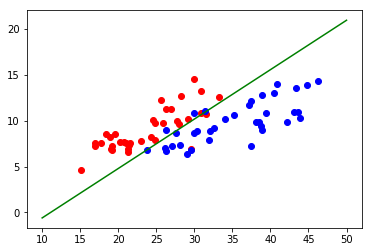

In [43]:
W = best_W

plt.scatter(awrat_test[:,0], awrat_test[:,1], c = 'r')
plt.scatter(spnott_test[:,0], spnott_test[:,1], c = 'b')
x = np.linspace(10,50)
m = -W[1]/W[2]
c = -W[0]/W[2]
plt.plot(x, y_mx_c(x, m, c), c = 'g')

## What is the overall classification rate and the class classification rate on the test set? [5marks]


In [15]:
# also 1-best_error
print("The classification rate/accuracy is: ", get_accuracy(d_test, predict_y(np.asarray(best_W), d_test[:,[0,1]])))

The classification rate/accuracy is:  0.9305555555555556


## Write down the cross-entropy cost function and find the partial derivatives wrt weights. (Use MathJax) [10 marks]

\begin{align}
J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)} log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1 - h_\theta(x^{(i)}))
\end{align}

Let $z = \theta^{T}x$

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)} log(\frac{1}{1+e^{-z}}) + (1-y^{(i)}) log(1 - \frac{1}{1+e^{-z}})
\end{align}

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)} log(\frac{1}{1+e^{-z}}) + (1-y^{(i)}) log(\frac{e^{-z}}{1+e^{-z}})
\end{align}

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)} (-log({1+e^{-z}})) + (1-y^{(i)}) ( log(e^{-z})-log(1+e^{-z}) )
\end{align}

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M -y^{(i)} (log({1+e^{-z}})) + log(e^{-z})-log(1+e^{-z}) -y^{(i)}log(e^{-z})+y^{(i)}log(1+e^{-z})
\end{align}

Taking log to be the natural log with base e (ln):

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M log(e^{-z})-log(1+e^{-z}) + y^{(i)}z
\end{align}

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M -(log(e^{z})+log(1+e^{-z})) + y^{(i)}z
\end{align}

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)}z-log(1+e^{z})
\end{align}

Let $\theta$ be $\theta^{T}$ for simplicity and clarity

Therefore:

\begin{align}
=> J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)}\theta^{T}x^{(i)} -log(1+e^{\theta x^{(i)}})
\end{align}

Now we can differentiate. Separate into 2 parts:

Part 1:

\begin{align}
\frac{\partial}{\partial \theta}(y^{(i)}\theta x^{(i)}) = y^{(i)}x^{(i)}
\end{align}

Part 2:

\begin{align}
\frac{\partial}{\partial \theta} (log(1+e^{\theta x^{(i)}}))
= \frac{e^{\theta x^{(i)}} x^{(i)}}{1+e^{\theta x^{(i)}}}
= \frac{x^{(i)}}{e^{-\theta x^{(i)}} (1+e^{\theta x^{(i)}} )}
= \frac{x^{(i)}}{(1+e^{-\theta x^{(i)}} )}
= x^{(i)} h_\theta(x^{(i)})
\end{align}

Finally:

\begin{align}
\frac{\partial}{\partial\theta}J(\theta) = - \frac{1}{M} \sum_{i=1}^M y^{(i)}x^{(i)} - x^{(i)} h_\theta(x^{(i)})
\end{align}

\begin{align}
\frac{\partial}{\partial\theta}J(\theta) = - \frac{1}{M} \sum_{i=1}^M x^{(i)} (y^{(i)} - h_\theta(x^{(i)}))
\end{align}

## Code the gradient descent algorithm to minimize the cross-entropy cost function in a logistic regression model. Plot the error versus iterations and compute the train and test accuracy. [25 marks]

accuracy for train: 0.9047619047619048
accuracy for test: 0.875
Weights:  [ 0.39134942 -0.42699331  1.22695279]


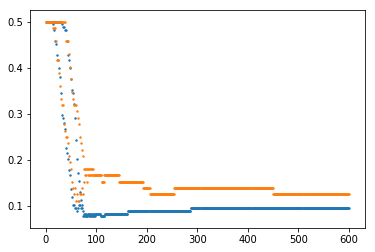

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# W = weights including bias (so size is 1 + size of input rows)
# X = multiple vector of inputs
# Y = vector of actual Ys
def partial_J(W = [], X = [], Y = []): # given a row of X and weights
    M = len(X)
    W.shape = (1, len(W)) # row
    X.shape = (len(X), X.shape[1])
    z = np.zeros(X.shape[0])
    z += W[0][0] # bias
    z += np.dot(W[0] [1:], X.T)
    
    h = sigmoid(z)
    
    a = Y - h
    ones_vector = np.ones(X.shape[0])
    newX = np.insert(X,0,ones_vector, axis = 1)
    summation = np.dot(newX.T, a)
    
    return -(1/M)*summation

# W = initial weights
# X = inputs
# Y = targets
# N = number of iterations
# A = learning rate alpha
def get_weights(W = [], X = [[]], Y = [], N = 0, A = 0):

    for i in range(N):
        W = (W - A * partial_J(W, X, Y))[0] # gradient descent
        
    return W

no_of_iterations = 601
iters = np.linspace(1, no_of_iterations, 1, dtype=int)
Weights = [None] * no_of_iterations
error_train = [None] * no_of_iterations
error_test = [None] * no_of_iterations

for i in range(no_of_iterations):
    Weights[i] = get_weights(np.asarray([0.1,0.1,0.1]), d_train[:,[0,1]], d_train[:,2], i, 0.01)
    error_test[i] = get_error(d_test, predict_y(np.asarray(Weights[i]), d_test[:,[0,1]]))
    error_train[i] = get_error(d_train, predict_y(np.asarray(Weights[i]), d_train[:,[0,1]]))

accuracy_train = 1 - np.asarray(error_train[:-1])
accuracy_test = 1 - np.asarray(error_test[:-1])

plt.scatter(range(no_of_iterations), error_train, s=2)
plt.scatter(range(no_of_iterations), error_test, s=2)

print("accuracy for train:", accuracy_train[-1])
print("accuracy for test:", accuracy_test[-1])

print("Weights: ", Weights[-1])

plt.show()



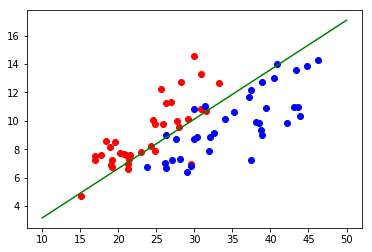

In [49]:
W = np.asarray(Weights[-1])

plt.scatter(awrat_test[:,0], awrat_test[:,1], c = 'r')
plt.scatter(spnott_test[:,0], spnott_test[:,1], c = 'b')
x = np.linspace(10,50)
m = -W[1]/W[2]
c = -W[0]/W[2]
plt.plot(x, y_mx_c(x, m, c), c = 'g')
plt.show()

## Is there any significant difference between the results obtained with the random search and the results obtained using gradient descent? [5 marks]

The random search is inconsistent, unlike the gradient descent. While the weights are quite different, the accuracy is similar, close to 0.9.